In [67]:
import os
os.chdir(os.getcwd())

# Import Module

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn import metrics
from sklearn.cluster import KMeans

import matplotlib as mpl
%matplotlib inline
mpl.font_manager.fontManager.addfont('../thsarabunnew-webfont.ttf')
sns.set(font='TH Sarabun New')


# Import Data 

In [69]:
# Code
df = pd.read_excel('assignment2_clustering_data.xlsx',sheet_name='2564')
df.tail()

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
28,หน่วยงานอื่นของรัฐ,-,-,-,563.2,-,563.2
29,สภากาชาดไทย,-,-,-,8871.6,-,8871.6
30,ส่วนราชการในพระองค์,-,-,-,8980.9,-,8980.9
31,ทุนหมุนเวียน,-,-,-,19916.6,203108.1,223024.7
32,รวมทั้งสิ้น,641434.7,234204.2,500113.7,1117797.4,792412.5,3285962.5


# Part 1

ใช้งบประมาณรายจ่ายส่วนย่อย 5 ด้าน ในปี 2564 จัดกลุ่มกระทรวงตามงบประมาณรายจ่าย ด้วยวิธี K-mean, Hierarchical และ DBScan   ในแต่ละวิธี  ให้เหตุผลในการเลือก ค่า parameter ในการทำ clustering   ระบุว่า วิธีใด ให้ผลลัพธ์ Clustering ที่ดีที่สุด อภิปรายเหตุผล ว่า เพราะเหตุใดจึงเป็นเช่นนั้่น

# K-mean

In [70]:
# Code
main_2564=pd.read_excel('assignment2_clustering_data.xlsx', sheet_name='2564').drop(32)
main_2564.tail()

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
27,องค์กรปกครองส่วนท้องถิ่น,-,-,-,91348.5,-,91348.5
28,หน่วยงานอื่นของรัฐ,-,-,-,563.2,-,563.2
29,สภากาชาดไทย,-,-,-,8871.6,-,8871.6
30,ส่วนราชการในพระองค์,-,-,-,8980.9,-,8980.9
31,ทุนหมุนเวียน,-,-,-,19916.6,203108.1,223024.7


In [71]:
'''

    งบบุคลากร(1.1)

'''

'\n\n    งบบุคลากร(1.1)\n\n'

In [72]:
#k_mean_2564_drop = k_mean_2564.drop("รวม",axis=1).drop(32)
#df = orig_df[['Pclass','Age','SibSp', 'Parch','Fare']]
k_mean_2564_1=main_2564[['งบบุคลากร']]
k_mean_2564_1.replace({'-':np.nan},inplace=True)
k_mean_2564_1=k_mean_2564_1.dropna()
k_mean_2564_1.tail()

C:\Users\TTCOM\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,งบบุคลากร
17,2321.9
18,223199.6
19,107548.0
20,1635.9
21,82025.0


In [73]:
''' 

    CODE FOR CUT OUTLINER

'''

' \n\n    CODE FOR CUT OUTLINER\n\n'

<AxesSubplot:>

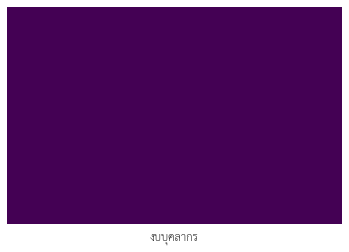

In [74]:
sns.heatmap(k_mean_2564_1.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [75]:
k_mean_2564_1.describe()

,งบบุคลากร
count,22.000000
mean,29156.122727
std,53267.919959
min,822.000000
25%,2415.750000
50%,10034.150000
75%,18395.150000
max,223199.600000


In [76]:
# ทด
# k_mean_2564_drop

In [77]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(k_mean_2564_1)
k_mean_2564_1_normalized = pd.DataFrame(array_normalized)
k_mean_2564_1_normalized.head()

,0
0,-0.262400
1,-0.481362
2,1.188844
3,-0.310663
4,-0.508401


In [78]:
k_mean_2564_1_normalized.describe()

,0
count,2.200000e+01
mean,-2.018587e-17
std,1.023533e+00
min,-5.444346e-01
25%,-5.138110e-01
50%,-3.674250e-01
75%,-2.067700e-01
max,3.728507e+00


Text(0, 0.5, 'SSE')

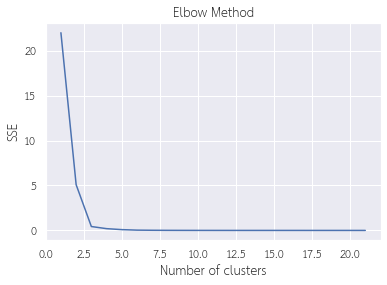

In [79]:
max_k = 22
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(k_mean_2564_1_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [80]:
k_1=3
# เพราะเป็นค่า Number of cluster ที่่ให้ความชันมากที่สุด

In [81]:
kmeans_1 = KMeans(n_clusters=k_1)
kmeans_1.fit(k_mean_2564_1_normalized)

KMeans(n_clusters=3)

In [82]:
cluster_predictions = kmeans_1.predict(k_mean_2564_1_normalized)
k_mean_2564_1['cluster_id'] = cluster_predictions
k_mean_2564_1

,งบบุคลากร,cluster_id
0,15500.0,0
1,4104.5,0
2,91027.4,1
3,12988.2,0
4,2697.3,0
5,1572.6,0
6,2746.6,0
7,11248.4,0
8,24376.6,0
9,9704.7,0


In [83]:
k_mean_2564_1.cluster_id.value_counts()

0    18
1     3
2     1
Name: cluster_id, dtype: int64

In [84]:
print(metrics.silhouette_score(k_mean_2564_1,kmeans_1.labels_))
'''

    I.   S (i)ใกล้กับ 0 หมายความว่าจุดอยู่ระหว่างสองคลัสเตอร์
    II.  ถ้ามันใกล้ -1 มากขึ้นเราก็ควรกำหนดให้กับคลัสเตอร์อื่นดีกว่า
    III. ถ้าS (i)อยู่ใกล้ 1 แสดงว่าจุดนั้นเป็นของคลัสเตอร์ "ถูกต้อง"

'''

0.851381957834223


'\n\n    I.   S (i)ใกล้กับ 0 หมายความว่าจุดอยู่ระหว่างสองคลัสเตอร์\n    II.  ถ้ามันใกล้ -1 มากขึ้นเราก็ควรกำหนดให้กับคลัสเตอร์อื่นดีกว่า\n    III. ถ้าS (i)อยู่ใกล้ 1 แสดงว่าจุดนั้นเป็นของคลัสเตอร์ "ถูกต้อง"\n\n'

In [85]:
print(metrics.davies_bouldin_score(k_mean_2564_1,kmeans_1.labels_))
# ยิ่งมีค่าน่อยยิ่งดี

0.14256355308100901


In [86]:
'''

    งบดําเนินงาน (1.2)

'''

'\n\n    งบดําเนินงาน (1.2)\n\n'

In [87]:
k_mean_2564_2=main_2564[['งบดําเนินงาน']]
k_mean_2564_2.replace({'-':np.nan},inplace=True)
k_mean_2564_2=k_mean_2564_2.dropna()
k_mean_2564_2.tail()

C:\Users\TTCOM\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,งบดําเนินงาน
18,20029.5
19,14411.4
20,603.4
21,18260.1
22,2824.2


In [88]:
''' 

    CODE FOR CUT OUTLINER

'''

' \n\n    CODE FOR CUT OUTLINER\n\n'

<AxesSubplot:>

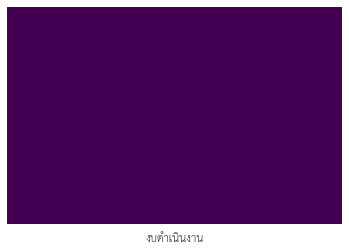

In [89]:
sns.heatmap(k_mean_2564_2.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [90]:
k_mean_2564_2.describe()

,งบดําเนินงาน
count,23.000000
mean,10182.791304
std,18722.586429
min,531.200000
25%,1507.950000
50%,2824.200000
75%,12106.950000
max,89908.000000


In [91]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(k_mean_2564_2)
k_mean_2564_2_normalized = pd.DataFrame(array_normalized)
k_mean_2564_2_normalized.head()


,0
0,4.353940
1,-0.387989
2,0.760203
3,-0.197416
4,-0.419047


In [92]:
k_mean_2564_2_normalized.describe()

,0
count,2.300000e+01
mean,-6.757879e-17
std,1.022475e+00
min,-5.270911e-01
25%,-4.737490e-01
50%,-4.018661e-01
75%,1.050818e-01
max,4.353940e+00


Text(0, 0.5, 'SSE')

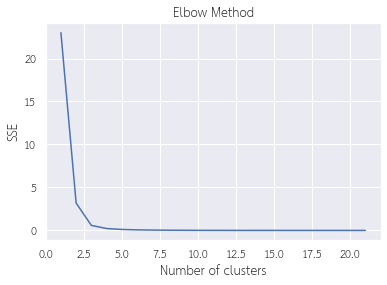

In [93]:
max_k = 22
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(k_mean_2564_2_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [100]:
k_2=3

In [101]:
kmeans_2 = KMeans(n_clusters=k_2)
kmeans_2.fit(k_mean_2564_2_normalized)

KMeans(n_clusters=3)

In [102]:
cluster_predictions = kmeans_2.predict(k_mean_2564_2_normalized)
k_mean_2564_2['cluster_id'] = cluster_predictions
k_mean_2564_2

,งบดําเนินงาน,cluster_id
0,89908.0,1
1,3078.3,0
2,24102.9,2
3,6567.9,0
4,2509.6,0
5,892.1,0
6,2519.3,0
7,939.9,0
8,11495.8,2
9,2436.2,0


In [103]:
k_mean_2564_2.cluster_id.value_counts()

0    16
2     6
1     1
Name: cluster_id, dtype: int64

In [104]:
print(metrics.silhouette_score(k_mean_2564_2,kmeans_2.labels_))

0.7037863620181773


In [105]:
print(metrics.davies_bouldin_score(k_mean_2564_2,kmeans_2.labels_))

0.28113833548558614


In [ ]:
'''

    งบลงทุน(1.3)

'''

In [106]:
k_mean_2564_3=main_2564[['งบลงทุน']]
k_mean_2564_3.replace({'-':np.nan},inplace=True)
k_mean_2564_3=k_mean_2564_3.dropna()
k_mean_2564_3.tail()

C:\Users\TTCOM\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,งบลงทุน
19,17025.5
20,745.8
21,20895.0
22,19502.0
23,17357.8


In [ ]:
''' 

    CODE FOR CUT OUTLINER

'''

<AxesSubplot:>

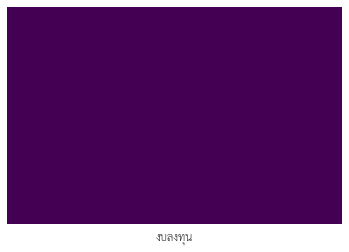

In [107]:
sns.heatmap(k_mean_2564_3.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [109]:
k_mean_2564_3.describe()

,งบลงทุน
count,24.000000
mean,20838.070833
std,38289.285601
min,375.700000
25%,1143.900000
50%,8030.350000
75%,19453.250000
max,177009.100000


In [110]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(k_mean_2564_3)
k_mean_2564_3_normalized = pd.DataFrame(array_normalized)
k_mean_2564_3_normalized.head()

,0
0,1.095478
1,-0.393078
2,-0.171063
3,-0.464659
4,-0.545328


In [111]:
k_mean_2564_3_normalized.describe()

,0
count,2.400000e+01
mean,7.401487e-17
std,1.021508e+00
min,-5.459092e-01
25%,-5.254146e-01
50%,-3.416932e-01
75%,-3.694520e-02
max,4.166438e+00


Text(0, 0.5, 'SSE')

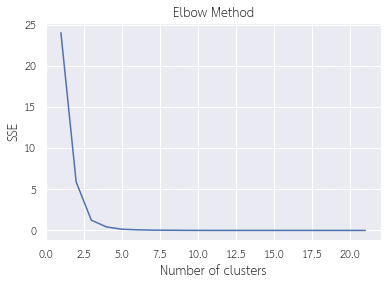

In [112]:
max_k = 22
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(k_mean_2564_3_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [113]:
k_3=3

In [114]:
kmeans_3 = KMeans(n_clusters=k_3)
kmeans_3.fit(k_mean_2564_3_normalized)

KMeans(n_clusters=3)

In [115]:
cluster_predictions = kmeans_3.predict(k_mean_2564_3_normalized)
k_mean_2564_3['cluster_id'] = cluster_predictions
k_mean_2564_3

,งบลงทุน,cluster_id
0,61900.0,0
1,6104.3,1
2,14426.1,1
3,3421.2,1
4,397.5,1
5,1564.4,1
6,397.8,1
7,9956.4,1
8,72292.8,0
9,177009.1,2


In [116]:

k_mean_2564_3.cluster_id.value_counts()

1    20
0     3
2     1
Name: cluster_id, dtype: int64

In [117]:
print(metrics.silhouette_score(k_mean_2564_3,kmeans_3.labels_))

0.7390527218878294


In [118]:
print(metrics.davies_bouldin_score(k_mean_2564_3,kmeans_3.labels_))

0.29699222483620996


In [ ]:
'''

    งบเงินอุดหนุน(1.4)

'''

In [119]:
k_mean_2564_4=main_2564[['งบเงินอุดหนุน']]
k_mean_2564_4.replace({'-':np.nan},inplace=True)
k_mean_2564_4=k_mean_2564_4.dropna()
k_mean_2564_4.tail()

C:\Users\TTCOM\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,งบเงินอุดหนุน
27,91348.5
28,563.2
29,8871.6
30,8980.9
31,19916.6


In [ ]:
''' 

    CODE FOR CUT OUTLINER

'''

<AxesSubplot:>

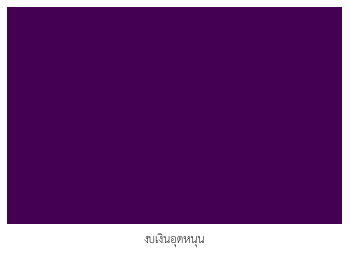

In [120]:
sns.heatmap(k_mean_2564_4.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [121]:
k_mean_2564_4.describe()

,งบเงินอุดหนุน
count,31.000000
mean,36057.980645
std,78764.467952
min,30.700000
25%,1087.150000
50%,6637.500000
75%,18840.450000
max,370782.600000


In [122]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(k_mean_2564_4)
k_mean_2564_4_normalized = pd.DataFrame(array_normalized)
k_mean_2564_4_normalized.head()

,0
0,4.319938
1,-0.305367
2,-0.403486
3,-0.457627
4,-0.447956


In [123]:
k_mean_2564_4_normalized.describe()

,0
count,3.100000e+01
mean,-1.074409e-16
std,1.016530e+00
min,-4.649662e-01
25%,-4.513317e-01
50%,-3.796992e-01
75%,-2.222085e-01
max,4.319938e+00


Text(0, 0.5, 'SSE')

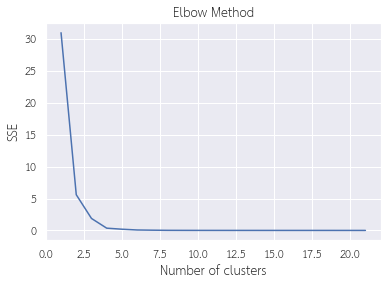

In [125]:
max_k = 22
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(k_mean_2564_4_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [126]:
k_4=3

In [127]:
kmeans_4 = KMeans(n_clusters=k_4)
kmeans_4.fit(k_mean_2564_4_normalized)

KMeans(n_clusters=3)

In [128]:
cluster_predictions = kmeans_4.predict(k_mean_2564_4_normalized)
k_mean_2564_4['cluster_id'] = cluster_predictions
k_mean_2564_4

,งบเงินอุดหนุน,cluster_id
0,370782.6,1
1,12397.0,0
2,4794.4,0
3,599.4,0
4,1348.7,0
5,735.9,0
6,16598.3,0
7,104384.6,2
8,2001.1,0
9,57.1,0


In [129]:
k_mean_2564_4.cluster_id.value_counts()

0    25
2     4
1     2
Name: cluster_id, dtype: int64

In [130]:
print(metrics.silhouette_score(k_mean_2564_4,kmeans_4.labels_))

0.8367601175058708


In [131]:
print(metrics.davies_bouldin_score(k_mean_2564_4,kmeans_4.labels_))

0.32734358107705686


In [ ]:
'''

    งบรายจ่ายอื่น(1.5)

'''

In [133]:
k_mean_2564_5=main_2564[['งบรายจ่ายอื่น']]
k_mean_2564_5.replace({'-':np.nan},inplace=True)
k_mean_2564_5=k_mean_2564_5.dropna()
k_mean_2564_5.tail()

C:\Users\TTCOM\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,งบรายจ่ายอื่น
20,1516.2
21,3321.6
22,783.3
23,120057.9
31,203108.1


In [ ]:
''' 

    CODE FOR CUT OUTLINER

'''

<AxesSubplot:>

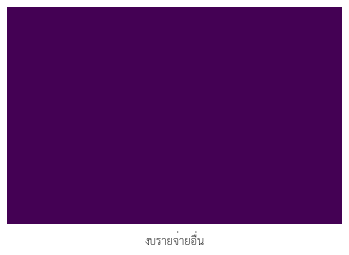

In [134]:
sns.heatmap(k_mean_2564_5.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
k_mean_2564_5.describe()

In [135]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(k_mean_2564_5)
k_mean_2564_5_normalized = pd.DataFrame(array_normalized)
k_mean_2564_5_normalized.head()

,0
0,0.695543
1,-0.280669
2,0.752239
3,3.307378
4,-0.473115


In [136]:
k_mean_2564_5_normalized.describe()

,0
count,2.500000e+01
mean,-1.776357e-17
std,1.020621e+00
min,-4.905467e-01
25%,-4.796316e-01
50%,-4.664807e-01
75%,-2.806695e-01
max,3.307378e+00


Text(0, 0.5, 'SSE')

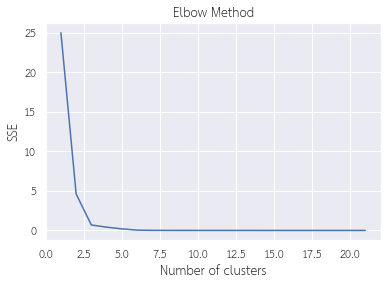

In [137]:
max_k = 22
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(k_mean_2564_5_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [138]:
k_5=3

In [139]:
kmeans_5 = KMeans(n_clusters=k_5)
kmeans_5.fit(k_mean_2564_5_normalized)

KMeans(n_clusters=3)

In [140]:
cluster_predictions = kmeans_5.predict(k_mean_2564_5_normalized)
k_mean_2564_5['cluster_id'] = cluster_predictions
k_mean_2564_5

,งบรายจ่ายอื่น,cluster_id
0,76525.6,2
1,13606.8,1
2,80179.8,2
3,244863.5,0
4,1203.3,1
5,1327.7,1
6,79.8,1
7,1597.7,1
8,564.8,1
9,751.6,1


In [141]:
k_mean_2564_5.cluster_id.value_counts()

1    20
2     3
0     2
Name: cluster_id, dtype: int64

In [142]:
print(metrics.silhouette_score(k_mean_2564_5,kmeans_5.labels_))

0.8852662834772083


In [143]:
print(metrics.davies_bouldin_score(k_mean_2564_5,kmeans_5.labels_))

0.282891946378849


# Hierarchical

In [94]:
# Code

# DBScan

In [95]:
# Code

# Part 2

ใช้งบประมาณรายจ่ายส่วนย่อย 5 ด้าน ในปี 2560-2564  จัดกลุ่มกระทรวงตามงบประมาณรายจ่าย แยกตามปี (ไม่รวมทุกปีเข้าด้วยกัน)  ด้วยวิธี K-mean


In [96]:
# Code